Linear Regression

In [ ]:
import torch

x = torch.tensor([[1,2,3], [4,5,6], [7,8,9]])
y = torch.FloatTensor([[1,2,3], [4,5,6], [7,8,9]])
print("x =", x)
print("y =", y)
print("Size:", x.size())
print("Shape:", x.shape)
print("차원(랭크):", x.ndimension())

x0 = torch.unsqueeze(x,0)
x1 = torch.unsqueeze(x,1)
x2 = torch.unsqueeze(x,2)
print("x0.shape:",x0.shape)
print("x1.shape:",x1.shape)
print("x2.shape:",x2.shape)
print("x0 =", x0)
print("x1 =", x1)
print("x2 =", x2)

x3 = torch.squeeze(torch.squeeze(x0))
print("x3 =", x3)
print("x3.shape =", x3.shape)

x4 = x.view(9)
x5 = x.view(1,3,3)
print("x4 =", x4)
print("x5 =", x5)

x = torch.FloatTensor([[1,2], [3,4], [5,6]])
w = torch.randn(1,2, dtype=torch.float)
b = torch.randn(3,1, dtype=torch.float)

result = torch.mm(x, torch.t(w)) + b # 방법 1
# torch.t(w) == w.T
# result = x @ w.T + b # 방법 2
print(result)

w = torch.tensor(1.0, requires_grad = True)
a = w*3
l = a**2
l.backward()
print('l을 w로 미분한 값은', w.grad)

x = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
y = tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
Size: torch.Size([3, 3])
Shape: torch.Size([3, 3])
차원(랭크): 2
x0.shape: torch.Size([1, 3, 3])
x1.shape: torch.Size([3, 1, 3])
x2.shape: torch.Size([3, 3, 1])
x0 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
x1 = tensor([[[1, 2, 3]],

        [[4, 5, 6]],

        [[7, 8, 9]]])
x2 = tensor([[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]])
x3 = tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
x3.shape = torch.Size([3, 3])
x4 = tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
x5 = tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
tensor([[-0.2747],
        [-0.9064],
        [-0.2910]])
l을 w로 미분한 값은 tensor(18.)


In [ ]:
import torch

x_train = torch.FloatTensor([[1,2], [3,2], [3,7], [1,1], [1,0]])
y_train = torch.FloatTensor([[4], [8], [23], [1], [-2]])

w = torch.rand(2,1)
b = torch.rand(1,1)

lr = 0.01

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.mm(x_train, w) + b
  cost = torch.mean((hypothesis - y_train) ** 2)

  cost.backward()
  with torch.no_grad() as grd:
    w = w - lr * w.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print('epoch: {}, cost: {:.6f}, w: {}, b: {}'.format(epoch, cost.item(), w.squeeze(), b))

epoch: 0, cost: 64.970444, w: tensor([1.1490, 0.9301]), b: tensor([[0.4222]])
epoch: 100, cost: 1.477624, w: tensor([0.7200, 3.1171]), b: tensor([[-1.4158]])
epoch: 200, cost: 0.709719, w: tensor([0.9559, 3.1760]), b: tensor([[-2.2348]])
epoch: 300, cost: 0.364100, w: tensor([1.2372, 3.1366]), b: tensor([[-2.7445]])
epoch: 400, cost: 0.187110, w: tensor([1.4515, 3.0991]), b: tensor([[-3.1011]])
epoch: 500, cost: 0.096159, w: tensor([1.6066, 3.0712]), b: tensor([[-3.3557]])
epoch: 600, cost: 0.049418, w: tensor([1.7180, 3.0510]), b: tensor([[-3.5381]])
epoch: 700, cost: 0.025397, w: tensor([1.7978, 3.0366]), b: tensor([[-3.6689]])
epoch: 800, cost: 0.013052, w: tensor([1.8551, 3.0262]), b: tensor([[-3.7626]])
epoch: 900, cost: 0.006708, w: tensor([1.8961, 3.0188]), b: tensor([[-3.8298]])
epoch: 1000, cost: 0.003447, w: tensor([1.9255, 3.0135]), b: tensor([[-3.8780]])
epoch: 1100, cost: 0.001772, w: tensor([1.9466, 3.0097]), b: tensor([[-3.9126]])
epoch: 1200, cost: 0.000910, w: tensor([

In [ ]:
x_test = torch.FloatTensor([[5,10]])
test_result = torch.mm(x_test, w) + b
print(test_result)

tensor([[35.9998]])


In [ ]:
from sklearn.linear_model import LinearRegression

x = [[1,2], [3,2], [3,7], [1,1], [1,0]]
y = [[4], [8], [23], [1], [-2]]

lr = LinearRegression()
lr.fit(x, y)

print(lr.coef_, lr.intercept_)

print(lr.predict([[5,10]]))

[[2. 3.]] [-4.]
[[36.]]


Logistic Regression

In [ ]:
import torch

x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

w = torch.zeros(1,1)
b = torch.zeros(1,1)
# bce = torch.nn.BCELoss() # 방법 2

lr = 1.0

for epoch in range(3001):
  w.requires_grad_(True)
  b.requires_grad_(True)

  hypothesis = torch.sigmoid(torch.mm(x_train, w) + b)
  cost = torch.mean(-y_train * torch.log(hypothesis) -(1 - y_train) * torch.log(1 - hypothesis)) # 방법 1
  # cost = bce(h, y_train) # 방법 2

  cost.backward() # grad 값들이 0이라는 가정하에 계산
  with torch.no_grad() as grd:
    w = w - lr * w.grad
    b = b - lr * b.grad

    if epoch % 100 == 0:
      print('epoch: {}, cost: {:.6f}, w: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), w.squeeze(), b.squeeze()))


epoch: 0, cost: 0.693147, w: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, w: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, w: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, w: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, w: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, w: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, w: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, w: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, w: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, w: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, w: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, w: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, w: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, w: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, w: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, w: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, w: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, w: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [ ]:
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, w) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


In [ ]:
w = torch.randn(1,1,requires_grad=True)
b = torch.randn(1,1,requires_grad=True)

optimizer = torch.optim.SGD([w,b], lr=1.0)

# optimizer = torch.optim.Adam([w,b], lr=1.0)
# optimizer = torch.optim.Adadelta([w,b])
# optimizer = torch.optim.Adagrad([w,b])
# optimizer = torch.optim.RMSprop([w,b])

for epoch in range(3001):

  h = torch.sigmoid(x_train @ w + b)
  cost = torch.mean(-y_train * torch.log(h) -(1-y_train) * torch.log(1-h))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print(epoch, cost.item(), w.item(), b.item())

0 0.6274030804634094 -0.16432303190231323 0.7007696628570557
100 0.41834259033203125 -1.4811538457870483 4.498821258544922
200 0.3981444537639618 -1.9152185916900635 5.8247456550598145
300 0.39056214690208435 -2.1856212615966797 6.643683910369873
400 0.38687312602996826 -2.3755435943603516 7.216330051422119
500 0.384846568107605 -2.516857862472534 7.6412506103515625
600 0.38365164399147034 -2.625636339187622 7.967731475830078
700 0.3829139471054077 -2.7112531661987305 8.224355697631836
800 0.38244369626045227 -2.7796971797943115 8.429304122924805
900 0.3821367919445038 -2.835040807723999 8.594898223876953
1000 0.3819330036640167 -2.8801748752593994 8.729865074157715
1100 0.3817957639694214 -2.917227268218994 8.840612411499023
1200 0.38170233368873596 -2.9478044509887695 8.931971549987793
1300 0.3816383183002472 -2.97314453125 9.007659912109375
1400 0.3815940320491791 -2.9942104816436768 9.070566177368164
1500 0.38156330585479736 -3.0117764472961426 9.12300968170166
1600 0.3815418779850

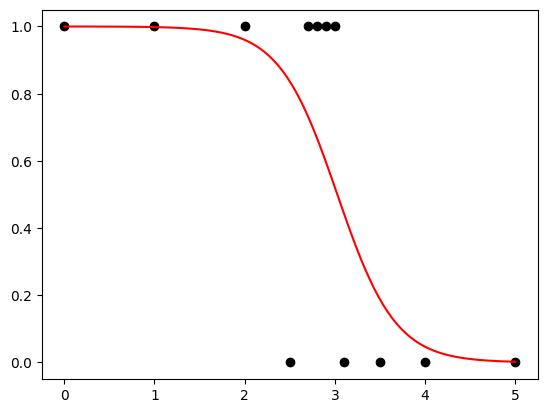

In [ ]:
import matplotlib.pyplot as plt
w.requires_grad_(False)
b.requires_grad_(False)

x = torch.linspace(0,5,100).unsqueeze(1) # torch.linspace(0,5,100) # 0부터 5까지 100개로 쪼개라
# [0.1, 0.2, ...] -> [[0.1], [0.2], ...]
y = torch.sigmoid(torch.mm(x,w)+b)

plt.scatter(x_train, y_train, c="black")
plt.plot(x, y, c="#ff0000")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty=None)
model.fit(x_train, y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
result = model.predict(x_test)
print(result)

[[-3.10385806]] [9.39776831]
[0 1]


Softmax Regression

In [ ]:
import torch

x_train = torch.FloatTensor([ [1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7] ])
y_train = torch.FloatTensor([ [0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0] ])

w = torch.randn(4, 3, requires_grad=True)
b = torch.randn(1, 3, requires_grad=True)

optimizer = torch.optim.Adam([w,b], lr=0.1)

# print(x_train)
# print(w)
# print(torch.mm(x_train, w))
# print(b)
# print(torch.mm(x_train, w)+b)

for epoch in range(3001):
  hypothesis = torch.softmax(torch.mm(x_train, w)+b, dim=1)
  cost = -torch.mean(torch.sum(y_train * torch.log(hypothesis), dim=1))

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    if epoch % 300 == 0:
      print("epoch; {}, cost: {:.6f}".format(epoch, cost.item()))

epoch; 0, cost: 7.128643
epoch; 300, cost: 0.194833
epoch; 600, cost: 0.092508
epoch; 900, cost: 0.053266
epoch; 1200, cost: 0.034186
epoch; 1500, cost: 0.023556
epoch; 1800, cost: 0.017054
epoch; 2100, cost: 0.012795
epoch; 2400, cost: 0.009859
epoch; 2700, cost: 0.007754
epoch; 3000, cost: 0.006196


In [ ]:
w.requires_grad_(False)
b.requires_grad_(False)

x_test = torch.FloatTensor([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
test_all = torch.softmax(torch.mm(x_test, w)+b, dim=1)
print(test_all)
print(torch.argmax(test_all, dim=1))

tensor([[1.0000e+00, 6.1884e-17, 1.0082e-33],
        [3.7945e-05, 7.4699e-01, 2.5297e-01],
        [3.5162e-30, 2.1404e-10, 1.0000e+00]])
tensor([0, 1, 2])


In [ ]:
a = torch.FloatTensor([[1,3,2,6,4], [7,2,9,3,8]])
print(torch.argmax(a, dim=1))
print(torch.argmax(a))

tensor([3, 2])
tensor(7)


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn

x_train = torch.FloatTensor([[1,2,1,1],[2,1,3,2],[3,1,3,4],[4,1,5,5],[1,7,5,5],[1,2,5,6],[1,6,6,6],[1,7,7,7]])
y_train = torch.LongTensor([ 2,2,2,1,1,1,0,0 ])

model = nn.Linear(4,3)
# print(model) # bias = True는 b가 있다는 뜻!
# for x in model.parameters():
#   print(x)

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

for epoch in range(3001):
  h = model(x_train)
  cost = F.cross_entropy(h, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 2.466883
epoch: 100, cost: 0.344061
epoch: 200, cost: 0.225453
epoch: 300, cost: 0.156072
epoch: 400, cost: 0.114271
epoch: 500, cost: 0.087339
epoch: 600, cost: 0.068934
epoch: 700, cost: 0.055775
epoch: 800, cost: 0.046031
epoch: 900, cost: 0.038611
epoch: 1000, cost: 0.032829
epoch: 1100, cost: 0.028235
epoch: 1200, cost: 0.024523
epoch: 1300, cost: 0.021480
epoch: 1400, cost: 0.018954
epoch: 1500, cost: 0.016834
epoch: 1600, cost: 0.015036
epoch: 1700, cost: 0.013499
epoch: 1800, cost: 0.012174
epoch: 1900, cost: 0.011023
epoch: 2000, cost: 0.010018
epoch: 2100, cost: 0.009134
epoch: 2200, cost: 0.008353
epoch: 2300, cost: 0.007660
epoch: 2400, cost: 0.007042
epoch: 2500, cost: 0.006488
epoch: 2600, cost: 0.005990
epoch: 2700, cost: 0.005542
epoch: 2800, cost: 0.005135
epoch: 2900, cost: 0.004767
epoch: 3000, cost: 0.004431


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression

x_train = np.array([[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]])

y_train = np.array([ 2, 2, 2, 1, 1, 1, 0, 0 ])

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

pred = logistic.predict([[1,11,10,9], [1,3,4,3], [1,1,0,1]])
print(pred)

[0 2 2]
